# Ch1 - Introduction au traitement d'images avec Python

**INF600F - Traitement d'images (UQÀM)**

* Tutoriel d'introduction à Python utilisé pour le cours de traitement d'images enseigné à l'UQAM. 
* **Professeur**: Joël Lefebvre (https://linum-lab.ca)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-from-mtl/teaching/blob/main/notebooks/inf600f-images/ch1-images/ch1-images.ipynb)

# Importation des modules

In [7]:
import imageio # Lecture / écriture des images
import numpy as np # Algébre linéaire
import matplotlib.pyplot as plt # Afficher images

# Lecture d’une image
Source : https://www.instagram.com/p/CKWlRl9gioa/

In [8]:
img_source = "https://github.com/joe-from-mtl/teaching/blob/main/notebooks/inf600f-images/ch1-images/instragram_uqam_sanders.png"
img = imageio.imread(img_source)
print(type(img))
print(img.shape)

<class 'imageio.core.util.Array'>
(596, 477, 4)


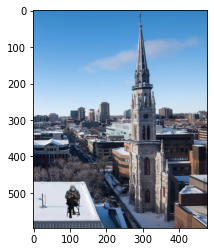

In [9]:
# Afficher l'image
plt.imshow(img)
plt.show()

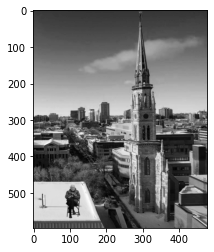

In [13]:
# Afficher le canal rouge uniquement, en ton de gris
plt.imshow(img[...,0], cmap="gray")
plt.show()

In [ ]:
# Afficher le canal bleu uniquement, avec une échelle de couleur synthétique
plt.imshow(img[...,1], cmap="viridis")
plt.show()

# Écriture d’une image

In [3]:
# Transformation en niveaux de gris
print("Taille de l'image originale: ", img.shape)
print("Type des pixels de l'image originale: ", img.dtype)

# Calcul de la moyenne des canaux RGB, et conversion en entier non-signé 8 bits
img_gray = img.mean(axis=2).astype(np.uint8)
print("Taille de l'image transformée: ", img_gray.shape)
print("Type des pixels de l'image transformée: ", img_gray.dtype)
imageio.imwrite("image_grise.tiff", img_gray)

print(f"Intensité min/max de l'image transformée: {img_gray.min()}/{img_gray.max()}")

(596, 477, 4)
uint8
uint8
(596, 477)
67 253


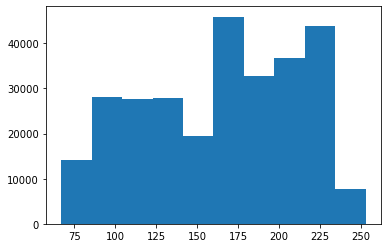

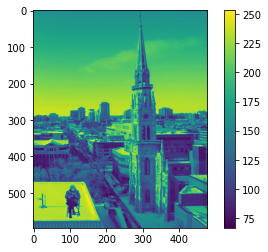

In [16]:
# Calcul de l'histogramme de l'image transformée
plt.hist(img_gray.ravel())

# Affichage de l'image transformée
plt.imshow(img_gray)
plt.title("Image en niveaux de gris")
plt.colorbar()
plt.show()

# Affichage d’une image

(596, 477)


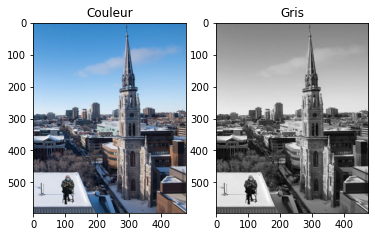

In [18]:
plt.subplot(1,2,1); plt.imshow(img); plt.title("Couleur")
plt.subplot(1,2,2); plt.imshow(img_gray, cmap="gray"); plt.title("Gris");
print(img_gray.shape)
plt.show()

# Informations à propos d’une image

In [5]:
print(img.shape) # Taille
print(img.dtype) # Format de pixel
print(img.min(), img.max()) # Intensité min et max
print(img.mean()) # Intensité moyenne pour toute l'image
print(img.size, img.shape[0] * img.shape[1] * 4) # Espace mémoire (bit)

(596, 477, 4)
uint8
0 255
164.93887182896458
1137168 1137168


# Manipulations de base

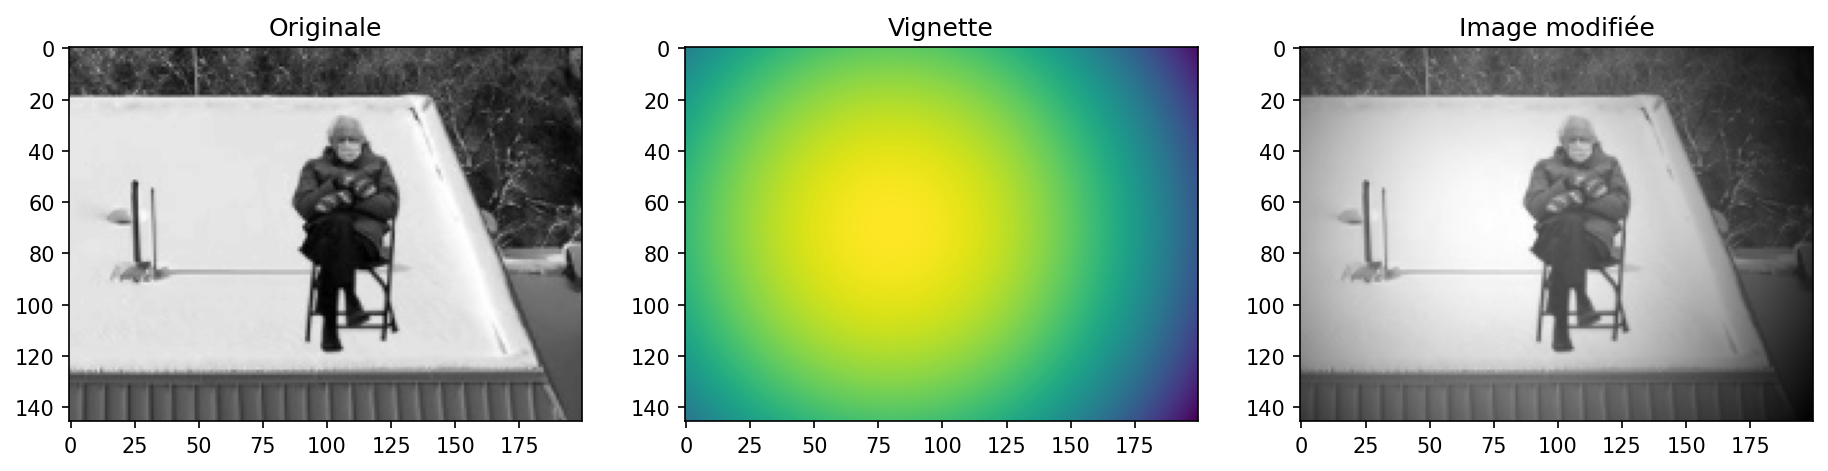

In [6]:
# Rogner une image en utilisant l'indexation de numpy
roi = img_gray[450::, 0:200] # Région d'intéret ou region of interest

# Ajouter vignette 
x, y = np.meshgrid(range(0, roi.shape[0]), range(0, roi.shape[1]), indexing="ij")
vignette = (x - 70)**2 + (y - 80)**2
vignette = (vignette - vignette.min()) / (vignette.max() - vignette.min()) # Normalise
vignette = 1 - vignette # inversion

# Image modifiée
roi_p = roi * vignette

plt.figure(figsize=(15,5), dpi=150)
plt.subplot(131); plt.imshow(roi, cmap="gray"); plt.title("Originale")
plt.subplot(132); plt.imshow(vignette); plt.title("Vignette")
plt.subplot(133); plt.imshow(roi_p, cmap="gray"); plt.title("Image modifiée")
plt.show()

In [19]:
# Afficher l'aide contextuelle de la fonction plt.plot dans un notebook
plt.plot?

In [20]:
# Afficher la documentation complète de la fonction plt.plot
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [23]:
# Quelques méthodes associées à un objet numpy.ndarray
print(img.max())
print(img.dtype)

255
uint8


In [30]:
# Conversion en 16 bits 
img_16b = img.astype(np.uint16)
print(img_16b.max())
img_16b.dtype

255


dtype('uint16')

In [31]:
# Assignation d'une valeur à un pixel, et indexation
img_16b[0,0,0] = 500
print(img_16b[0:4,0:4])

[[[500 135 202 255]
  [ 56 135 202 255]
  [ 56 135 202 255]
  [ 56 135 202 255]]

 [[ 57 136 202 255]
  [ 57 136 202 255]
  [ 57 136 202 255]
  [ 57 136 202 255]]

 [[ 57 136 202 255]
  [ 57 136 202 255]
  [ 57 136 202 255]
  [ 58 136 202 255]]

 [[ 58 137 203 255]
  [ 58 137 203 255]
  [ 58 137 203 255]
  [ 58 137 203 255]]]


In [32]:
img[0,0,0] = 500
print(img[0:4,0:4])

[[[244 135 202 255]
  [ 56 135 202 255]
  [ 56 135 202 255]
  [ 56 135 202 255]]

 [[ 57 136 202 255]
  [ 57 136 202 255]
  [ 57 136 202 255]
  [ 57 136 202 255]]

 [[ 57 136 202 255]
  [ 57 136 202 255]
  [ 57 136 202 255]
  [ 58 136 202 255]]

 [[ 58 137 203 255]
  [ 58 137 203 255]
  [ 58 137 203 255]
  [ 58 137 203 255]]]
